# Spatial operations and spatial joins

In this example we perform few spatial set operations and we learn how to join different spatial datasets. It is most important part of our presentation because it shows power of spatial operations over classic joins from relational databases. Spatial data has usually much more information than single column of other type in a database.

## Step 1: Import packages and read data

1. Read files:

- ```nybbwi_20d/nybbwi.shp``` with borders of the NYC boroughs.
- ```nysd_20d/nysd.shp``` with borders of the NYC school districts.

2. Import packages:

- ```numpy```,
- ```pandas```,
- ```geopandas```,
- ```matplotlib.pyplot```,
- and ```from shapely.geometry import Point```

3. Check if crs of two datasets is the same.

In [1]:
# Import libraries

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [2]:
# Read data

geo_base = gpd.read_file('nybbwi_20d/nybbwi.shp')
geo_schools = gpd.read_file('nysd_20d/nysd.shp')

In [3]:
# Check crs

geo_base.crs == geo_schools.crs

True

## Step 2: Plot both datasets at the same time

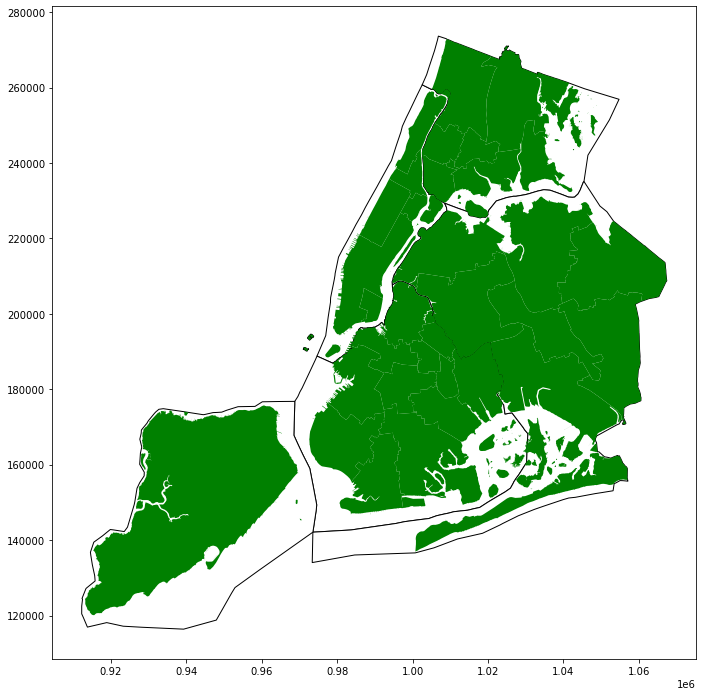

In [4]:
fs = (12, 12)

base = geo_base.plot(color='white', edgecolor='black', figsize=fs)
geo_schools.plot(ax=base, color='green');

> **IMPORTANT** Usually we plot multiple datasets in the same Figure. This is another reason why equal crs is crucial, if your plotting package is not well designed then you may see a strange result.

## Step 3: Select Brooklyn area for further processing. Create new variable with it.

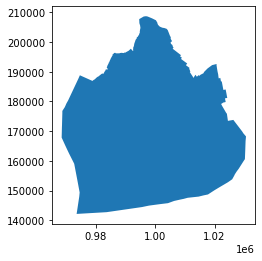

In [5]:
# Get Brooklyn

geo_base[geo_base['BoroName'] == 'Brooklyn'].plot()

brooklyn = geo_base[geo_base['BoroName'] == 'Brooklyn'].copy()

## Step 4: Perform spatial operations on Brooklyn and school districts areas.

- **Intersection** of all school districts with Brooklyn area,
- **Union** of all school districts with Brooklyn area,
- **Symetrical Difference** of all school districts and Brooklyn area,
- **Difference** of all school districts and Brooklyn area.

GeoPandas has method ```GeoDataFrame.overlay(geometry1, geometry2, how='name of operation')``` for those type of operations. Let's try it and check what is the output of each operation.

### Intersection

In [6]:
intersection = gpd.overlay(brooklyn, geo_schools, how='intersection')

In [7]:
intersection.head()

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
0,3,Brooklyn,234928.658563,2.684411e+09,13,86634.820950,1.048708e+08,"POLYGON ((983766.472 191538.898, 983822.462 19..."
1,3,Brooklyn,234928.658563,2.684411e+09,14,95607.545074,1.502956e+08,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."
2,3,Brooklyn,234928.658563,2.684411e+09,15,153453.530575,1.961542e+08,"POLYGON ((978902.038 186891.149, 978961.111 18..."
3,3,Brooklyn,234928.658563,2.684411e+09,16,35848.904082,4.676362e+07,"POLYGON ((1002796.091 192779.012, 1003004.900 ..."
4,3,Brooklyn,234928.658563,2.684411e+09,17,68341.203801,1.284413e+08,"POLYGON ((1006320.818 181792.022, 1006335.500 ..."


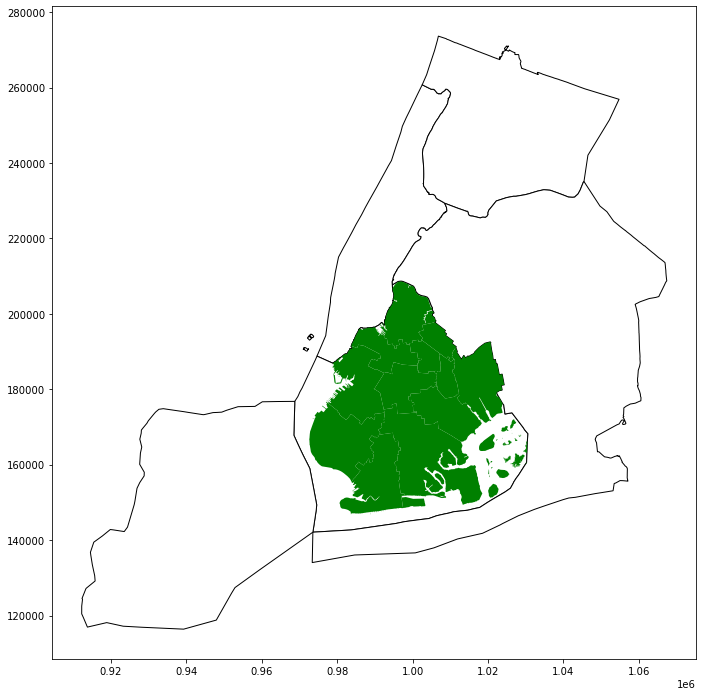

In [8]:
base = geo_base.plot(color='white', edgecolor='black', figsize=fs)
intersection.plot(ax=base, color='green');

### Union

In [9]:
union = gpd.overlay(brooklyn, geo_schools, how='union')
union.head()

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
0,3.0,Brooklyn,234928.658563,2.684411e+09,13.0,86634.820950,1.048708e+08,"POLYGON ((983766.472 191538.898, 983822.462 19..."
1,3.0,Brooklyn,234928.658563,2.684411e+09,14.0,95607.545074,1.502956e+08,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."
2,3.0,Brooklyn,234928.658563,2.684411e+09,15.0,153453.530575,1.961542e+08,"POLYGON ((978902.038 186891.149, 978961.111 18..."
3,3.0,Brooklyn,234928.658563,2.684411e+09,16.0,35848.904082,4.676362e+07,"POLYGON ((1002796.091 192779.012, 1003004.900 ..."
4,3.0,Brooklyn,234928.658563,2.684411e+09,17.0,68341.203801,1.284413e+08,"POLYGON ((1006320.818 181792.022, 1006335.500 ..."


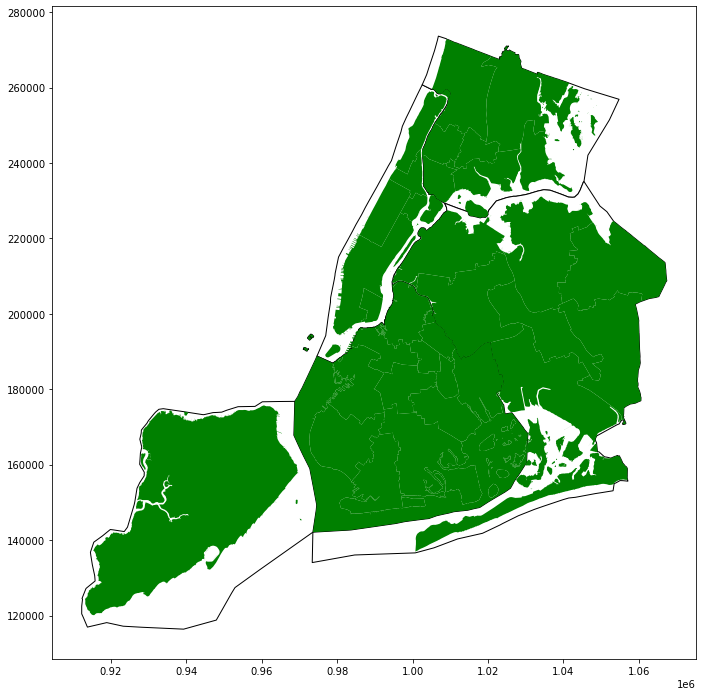

In [10]:
base = geo_base.plot(color='white', edgecolor='black', figsize=fs)
union.plot(ax=base, color='green');

### Symmetrical difference

In [11]:
symm_diff = gpd.overlay(brooklyn, geo_schools, how='symmetric_difference')
symm_diff.head()

,BoroCode,BoroName,Shape_Leng_1,Shape_Area_1,SchoolDist,Shape_Leng_2,Shape_Area_2,geometry
0,3.0,Brooklyn,234928.658563,2.684411e+09,NaN,NaN,NaN,"MULTIPOLYGON (((1023868.747 176222.723, 102416..."
1,NaN,NaN,NaN,NaN,1.0,28641.223059,3.516033e+07,"POLYGON ((992073.467 203714.076, 992068.667 20..."
2,NaN,NaN,NaN,NaN,10.0,94956.718074,2.825410e+08,"POLYGON ((1020767.838 268271.133, 1020752.058 ..."
3,NaN,NaN,NaN,NaN,11.0,305035.869503,3.932277e+08,"MULTIPOLYGON (((1048476.510 250658.966, 104836..."
4,NaN,NaN,NaN,NaN,12.0,48578.087537,6.909795e+07,"POLYGON ((1016662.949 248181.796, 1016897.339 ..."


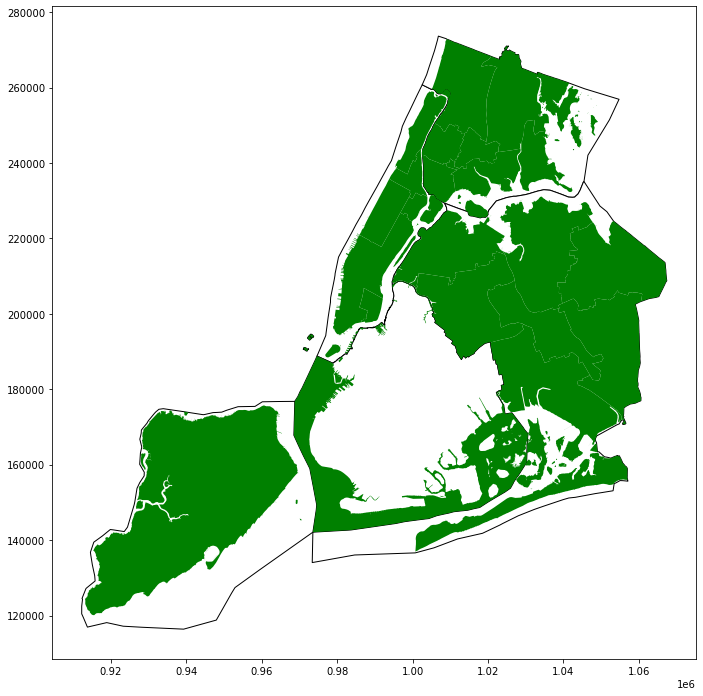

In [12]:
base = geo_base.plot(color='white', edgecolor='black', figsize=fs)
symm_diff.plot(ax=base, color='green');

### Difference

In [13]:
diff = gpd.overlay(brooklyn, geo_schools, how='difference')
diff.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
2,3,Brooklyn,234928.658563,2.684411e+09,"MULTIPOLYGON (((1023868.747 176222.723, 102416..."


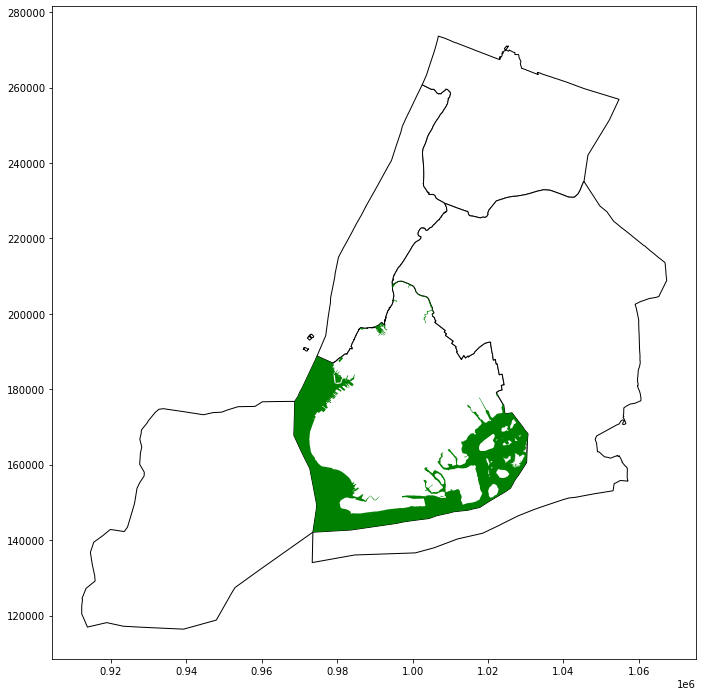

In [14]:
base = geo_base.plot(color='white', edgecolor='black', figsize=fs)
diff.plot(ax=base, color='green');

## Step 5: Perform spatial joins

Spatial joins are powerful operations. GeoPandas offers three operations of this type:

- ```append()```: similar to Pandas method of the same name,
- ```merge()```: similar to Pandas method of the same name but with one exception. If you merge DataFrame to GeoDataFrame then you preserve GeoDataFrame object. Otherwise your GeoDataFrame become DataFrame,
- ```sjoin()```: this is method available only in GeoPandas (in comparison do Pandas). It is the most important method from the spatial statistics perspective!

### Append

We can append new records to our GeoDataFrame. It is a simple operation and only one important thing is that geometry columns must have the same crs. 

In [15]:
manhattan = geo_base[geo_base['BoroName'] == 'Manhattan']

In [16]:
manhattan

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."


Now we append centroid of Brooklyn area to our GeoDataFrame.

In [17]:
app_gdf = manhattan.append(brooklyn.centroid, ignore_index=True)

In [18]:
app_gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,2
0,1,Manhattan,203803,9.44295e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",NaN
1,None,None,None,None,None,POINT (998185.3771081865 170520.8457826733)


Plot it!

<AxesSubplot:>

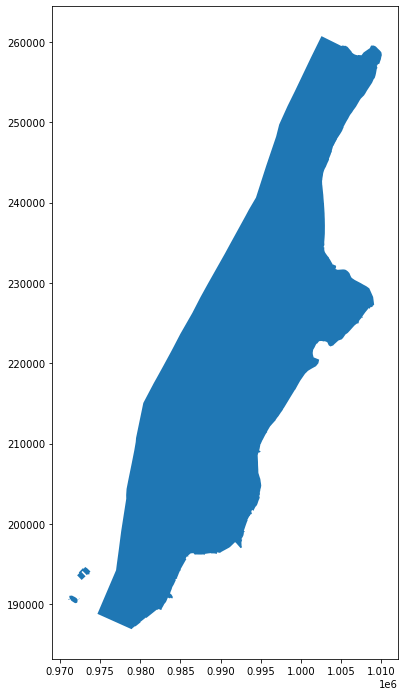

In [19]:
app_gdf.plot(figsize=fs)

> **IMPORTANT** Appending GeoDataFrames with ```geometry``` column is not so simple! You must remember to name column with geometry in every GeoDataFrame. In our example centroid ```Point``` was placed in column with name ```2```.

Let's do it again. Create new variable with Brooklyn centroid, name its column 'geometry' and then append it to the Manhattan polygon. Plot both geometries.

In [20]:
# Get centroid

cent = gpd.GeoDataFrame(brooklyn.centroid)

In [21]:
# Rename column to 'geometry'

cent.columns = ['geometry']

In [22]:
cent.geometry

2    POINT (998185.377 170520.846)
Name: geometry, dtype: geometry

In [23]:
# Append datasets

app_gdf = manhattan.append(cent)

In [24]:
app_gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,1.0,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184...."
2,NaN,NaN,NaN,NaN,POINT (998185.377 170520.846)


<AxesSubplot:>

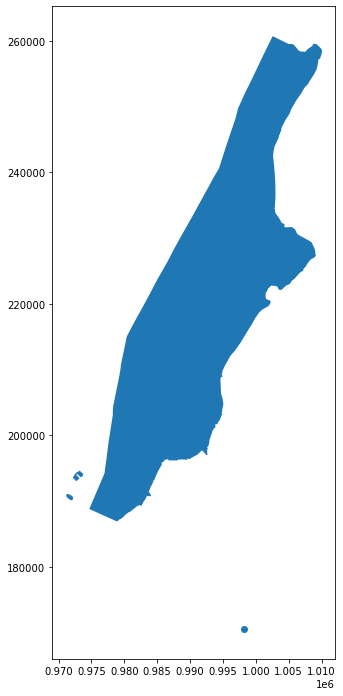

In [25]:
# Plot both geometries

app_gdf.plot(figsize=fs)

### Merge

```merge()``` operation is more complex than ```append()``` but gives more freedom if we'd like to join DataFrames into GeoDataFrames. And it's rather common scenario in a real world applications.
To prove it we will load our _NYC apartments_ dataset and merge it with GeoDataFrame of boroughs. Two sets have common values representing borough's name. We use it for join.

In [26]:
# Read csv file 'AB_NYC_2019.csv' into dataframe. Set index column to 'id'

df = pd.read_csv('AB_NYC_2019.csv', index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Merge on ```neighbourhood_group``` and ```BoroName``` columns

**Case 1:** DataFrame as left argument, GeoDataFrame as right argument.

In [27]:
merged_left_df = df.merge(geo_base, left_on='neighbourhood_group', right_on='BoroName')

In [28]:
merged_left_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
1,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
2,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
3,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."
4,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,3,Brooklyn,234928.658563,2.684411e+09,"POLYGON ((1004421.481 203543.225, 1004612.108 ..."


In [29]:
merged_left_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            48879 non-null  object  
 1   host_id                         48895 non-null  int64   
 2   host_name                       48874 non-null  object  
 3   neighbourhood_group             48895 non-null  object  
 4   neighbourhood                   48895 non-null  object  
 5   latitude                        48895 non-null  float64 
 6   longitude                       48895 non-null  float64 
 7   room_type                       48895 non-null  object  
 8   price                           48895 non-null  int64   
 9   minimum_nights                  48895 non-null  int64   
 10  number_of_reviews               48895 non-null  int64   
 11  last_review                     38843 non-null  object  
 12  reviews_per_month 

<AxesSubplot:>

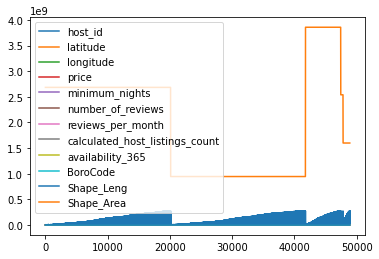

In [30]:
merged_left_df.plot() # !!! This is not a GeoDataFrame

> **IMPORTANT** Our left argument is DataFrame. That's why we've lost GeoDataFrame properties (such as ```geometry``` and ```crs```). To avoid this situation use GeoDataFrame on left.

**Case 2:** GeoDataFrame as left argument, DataFrame as right argument.

In [31]:
merged_left_gdf = geo_base.merge(df, left_on='BoroName', right_on='neighbourhood_group')

In [32]:
merged_left_gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [33]:
merged_left_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BoroCode                        48895 non-null  int64   
 1   BoroName                        48895 non-null  object  
 2   Shape_Leng                      48895 non-null  float64 
 3   Shape_Area                      48895 non-null  float64 
 4   geometry                        48895 non-null  geometry
 5   name                            48879 non-null  object  
 6   host_id                         48895 non-null  int64   
 7   host_name                       48874 non-null  object  
 8   neighbourhood_group             48895 non-null  object  
 9   neighbourhood                   48895 non-null  object  
 10  latitude                        48895 non-null  float64 
 11  longitude                       48895 non-null  float64 
 12  room_type 

<AxesSubplot:>

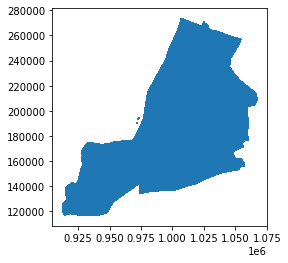

In [34]:
merged_left_gdf.plot()  # !!! Be careful, it will take a looong time because we have multiple geometries

> **IMPORTANT**: be careful with merges. Sometimes you may end with extremely large dataset which can use all available memory of your computer! Geometries, especially polygons, are heavy and you should avoid their duplication.

<AxesSubplot:>

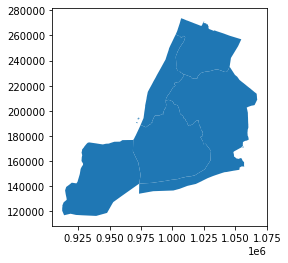

In [35]:
merged_left_gdf.drop_duplicates('BoroName')['geometry'].plot()

### sjoin (spatial join) - the most important operation!

Spatial join is very important because everything what we have done with ```append()``` and ```merge()``` can be performed by normal queries in databases. Spatial joins are different. This time we join on geometry using set operations and check if geometries _intersect_ with other or they are _within_ some geometry, or they _contain_ other geometries.

Usually you look into points within some areas or areas that contains group of points. Spatial join returns index to other GeoDataFrame (or geometry). That's why it is better to check points within polygons... We save a lot of memory! In our case we do it wrong :) and check areas that contain points with index to the point GeoDataFrame.

In [36]:
# First let's transform our DataFrame with points into GeoSeries

def lat_lon_to_point(dataframe, lon_col='longitude', lat_col='latitude'):
    """Function transform longitude and latitude coordinates into GeoSeries.
    
    INPUT:
    
    :param dataframe: DataFrame to be transformed,
    :param lon_col: (str) longitude column name, default is 'longitude',
    :param lat_col: (str) latitude column name, default is 'latitude'.
    
    OUTPUT:
    
    :return: (GeoPandas GeoSeries object)
    """

    geometry = dataframe.apply(lambda x: Point([x[lon_col], x[lat_col]]), axis=1)
    geoseries = gpd.GeoSeries(geometry)
    geoseries.name = 'geometry'
    
    return geoseries

In [37]:
gs = lat_lon_to_point(df)

In [38]:
gs

id
2539        POINT (-73.97237 40.64749)
2595        POINT (-73.98377 40.75362)
3647        POINT (-73.94190 40.80902)
3831        POINT (-73.95976 40.68514)
5022        POINT (-73.94399 40.79851)
                       ...            
36484665    POINT (-73.94995 40.67853)
36485057    POINT (-73.93317 40.70184)
36485431    POINT (-73.94867 40.81475)
36485609    POINT (-73.99112 40.75751)
36487245    POINT (-73.98933 40.76404)
Name: geometry, Length: 48895, dtype: geometry

In [39]:
# Set crs to epsg:4326

gs.crs = 'EPSG:4326'

<AxesSubplot:>

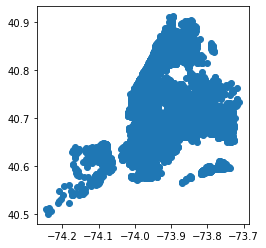

In [40]:
# Plot points

gs.plot()

In [41]:
# Now we use Boroughs dataset
# Check crs of boroughs dataset

geo_base.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
# Transform crs od GeoSeries

gs = gs.to_crs(geo_base.crs)

In [43]:
# Perform spatial join

apartments_within_ny = gpd.sjoin(geo_base, gpd.GeoDataFrame(gs), how="left", op='contains')

In [44]:
apartments_within_ny.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,index_right
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",6688780
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",24096826
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",21852332
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",11486601
0,1,Manhattan,203803.216852,9.442947e+08,"MULTIPOLYGON (((972081.788 190733.467, 972184....",35841291


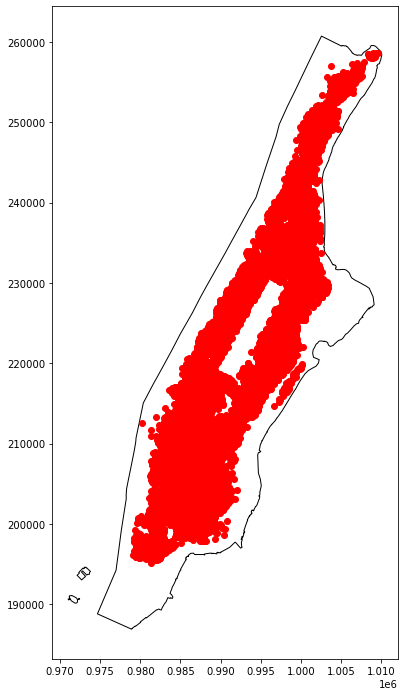

In [45]:
# Show that we really get indexes of desired points with Manhattan polygon

base = manhattan.plot(color='white', edgecolor='black', figsize=fs)
p_gs = gs.loc[apartments_within_ny[apartments_within_ny['BoroName'] == 'Manhattan']['index_right']]
p_gs.plot(ax=base, color='red');

---